### DAGUMATI VISHNUVARDHAN
### THE SPARKS FOUNDATION 
### DATA SCIENCE  AND BUSINESS ANALYTICS INTERN
#### DATASET : Iris.csv (Dataset: https://bit.ly/3kXTdox)
### Prediction using Unsupervised ML

##### TASK 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Finding the optimal number of clusters for K-Means and determining the value of K

In [5]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #Inertia is the sum of squared error for each cluster

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plotting the graph onto a line graph to observe the pattern

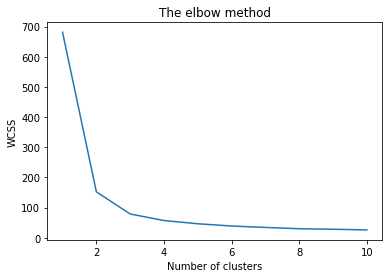

In [7]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

"The elbow method" got its name from the elbow pattern forming something like above. The optimal clusters are formed where the elbow occurs. This is when the WCSS(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.

Here we choose the number of clusters as '3'.

## Creating K-Means Classifier

In [8]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [9]:
df = pd.DataFrame(x)
df['cluster'] = y_kmeans
df['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

### Visualizing the cluster data 

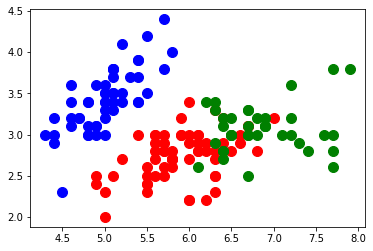

In [10]:
# Visualising the clusters 
# Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

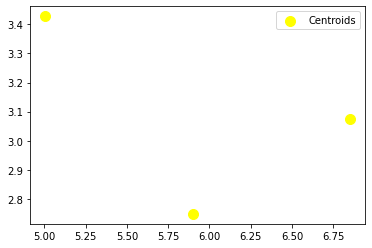

In [11]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Now Combining both the above graphs together

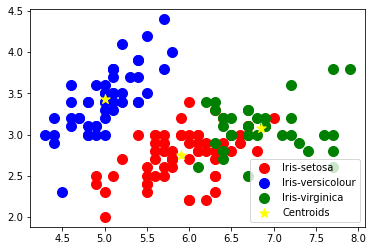

In [12]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow',marker='*', label = 'Centroids')

plt.legend()

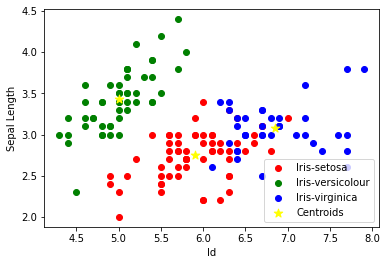

In [13]:
## Using Id and Sepal Length only
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],c = 'blue', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Sepal Length')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=80, c = 'yellow',marker='*', label = 'Centroids')

plt.legend()

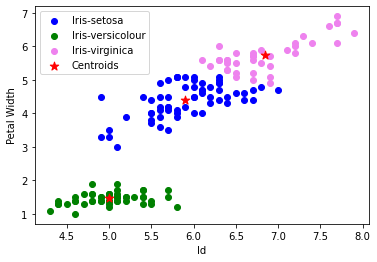

In [14]:
## Using Id and sepal Width only
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,2],c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,2],c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,2],c = 'violet', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Petal Width')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],s=80, c = 'red',marker='*', label = 'Centroids')

plt.legend()

In [15]:
from mpl_toolkits.mplot3d import Axes3D

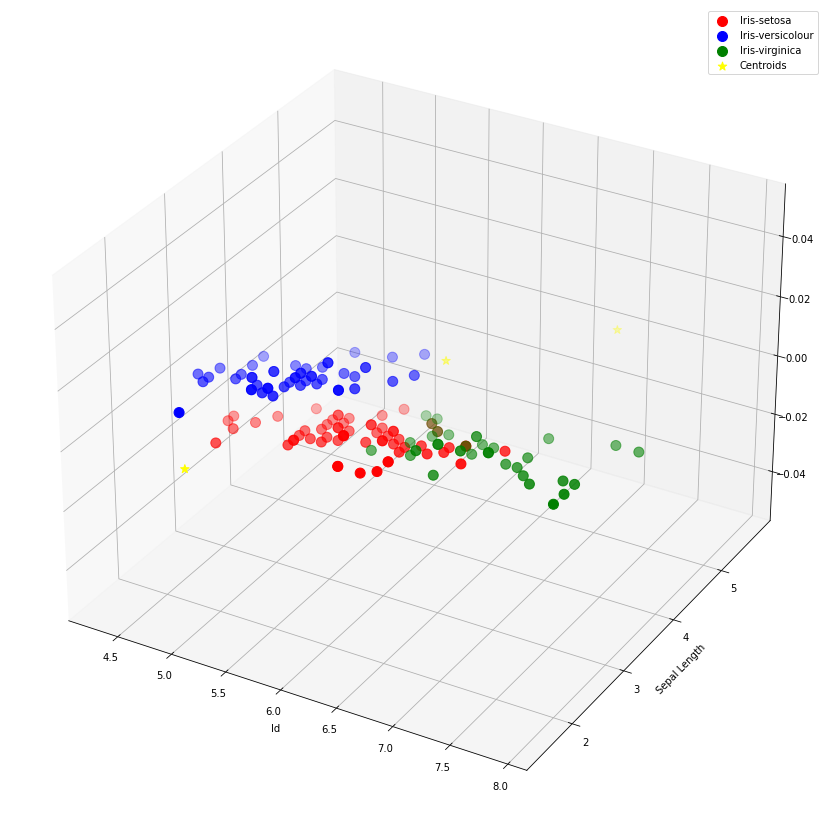

In [16]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],s=100,c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],s=100,c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],s=100,c = 'green', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Sepal Length')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],s=80, c = 'yellow',marker='*', label = 'Centroids')

plt.legend()
plt.show()